96


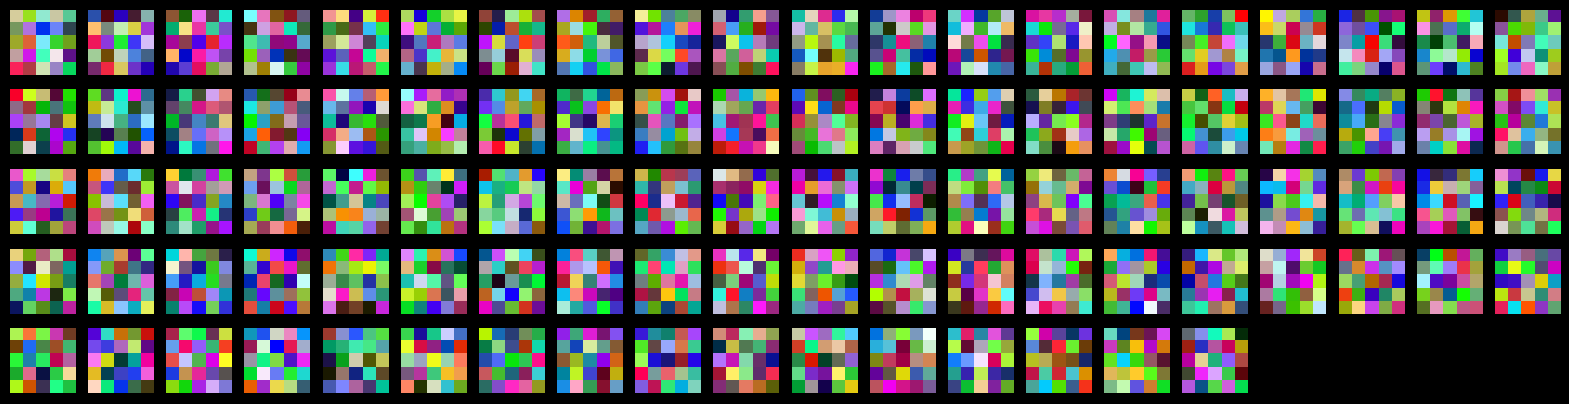

In [14]:
import torch
from model import DeepSoftHebb
torch.manual_seed(42)
import numpy as np
import matplotlib.pyplot as plt

# model = DeepSoftHebb(device='cpu', in_channels=3, dropout=0.0, input_size=28, neuron_centric=True, unsupervised_first=True)

# Load the model
model = torch.load('data/best_model.pth', map_location='cpu')
# Print the model weights 


# get the number of kernels in the first layer
num_kernels = model.conv1.weight.size(0)
print(num_kernels)

xaxes = num_kernels // 20 + 1
yaxes = 20
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background  
fig.patch.set_facecolor('black')

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        img = model.conv1.weight[count].detach().cpu().numpy().transpose(1, 2, 0)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1


In [2]:
# print t_invert
print(model.conv1.t_invert)
print(model.conv2.t_invert)
print(model.conv3.t_invert)

Parameter containing:
tensor(1.0025, requires_grad=True)
Parameter containing:
tensor(2.0009, requires_grad=True)
Parameter containing:
tensor(2.0000, requires_grad=True)


384


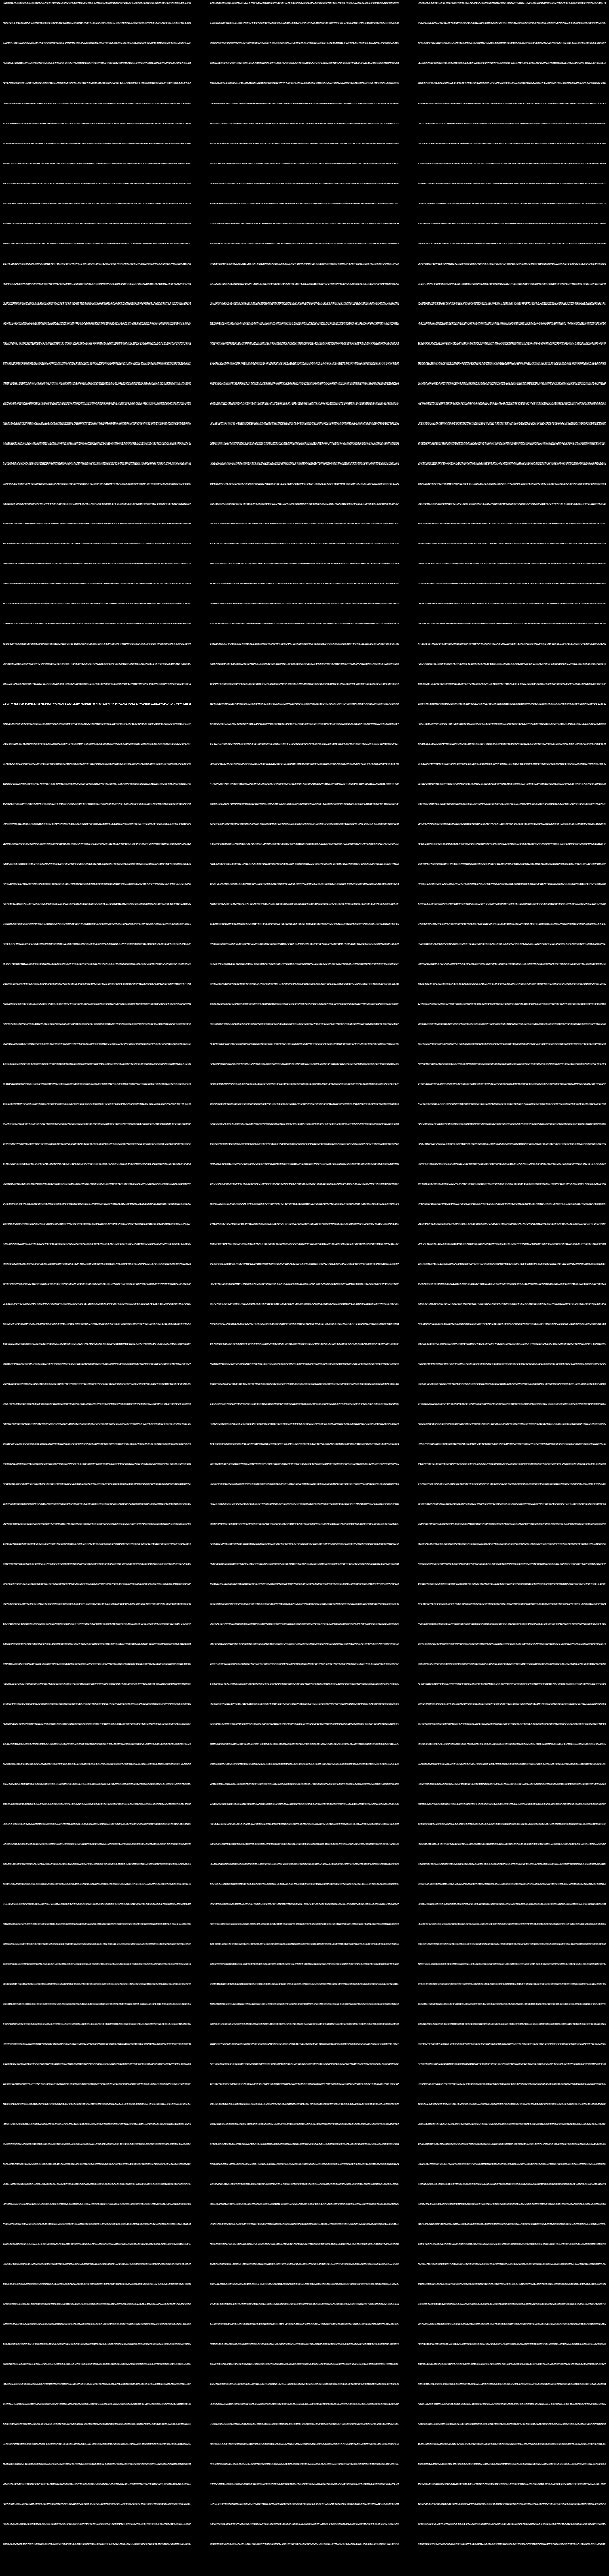

In [20]:
# print second layer kernel
num_kernels_2 = model.conv2.weight.size(0)
print(num_kernels_2)
num_channels = model.conv2.weight.size(1)

xaxes = num_kernels_2 // 3 + 1
yaxes = 3
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes * 10, xaxes))

# Set black background
fig.patch.set_facecolor('black')

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels_2:
            continue
        
        # Create a grid of all channels for the current kernel
        grid = []
        for c in range(num_channels):
            img = model.conv2.weight[count, c].detach().cpu().numpy()
            img = (img - img.min()) / (img.max() - img.min())
            grid.append(img)
        
        grid = np.concatenate(grid, axis=1)
        
        if xaxes == 1:
            axes[j].imshow(grid, cmap='gray')
        else:
            axes[i, j].imshow(grid, cmap='gray')
        count += 1

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


64


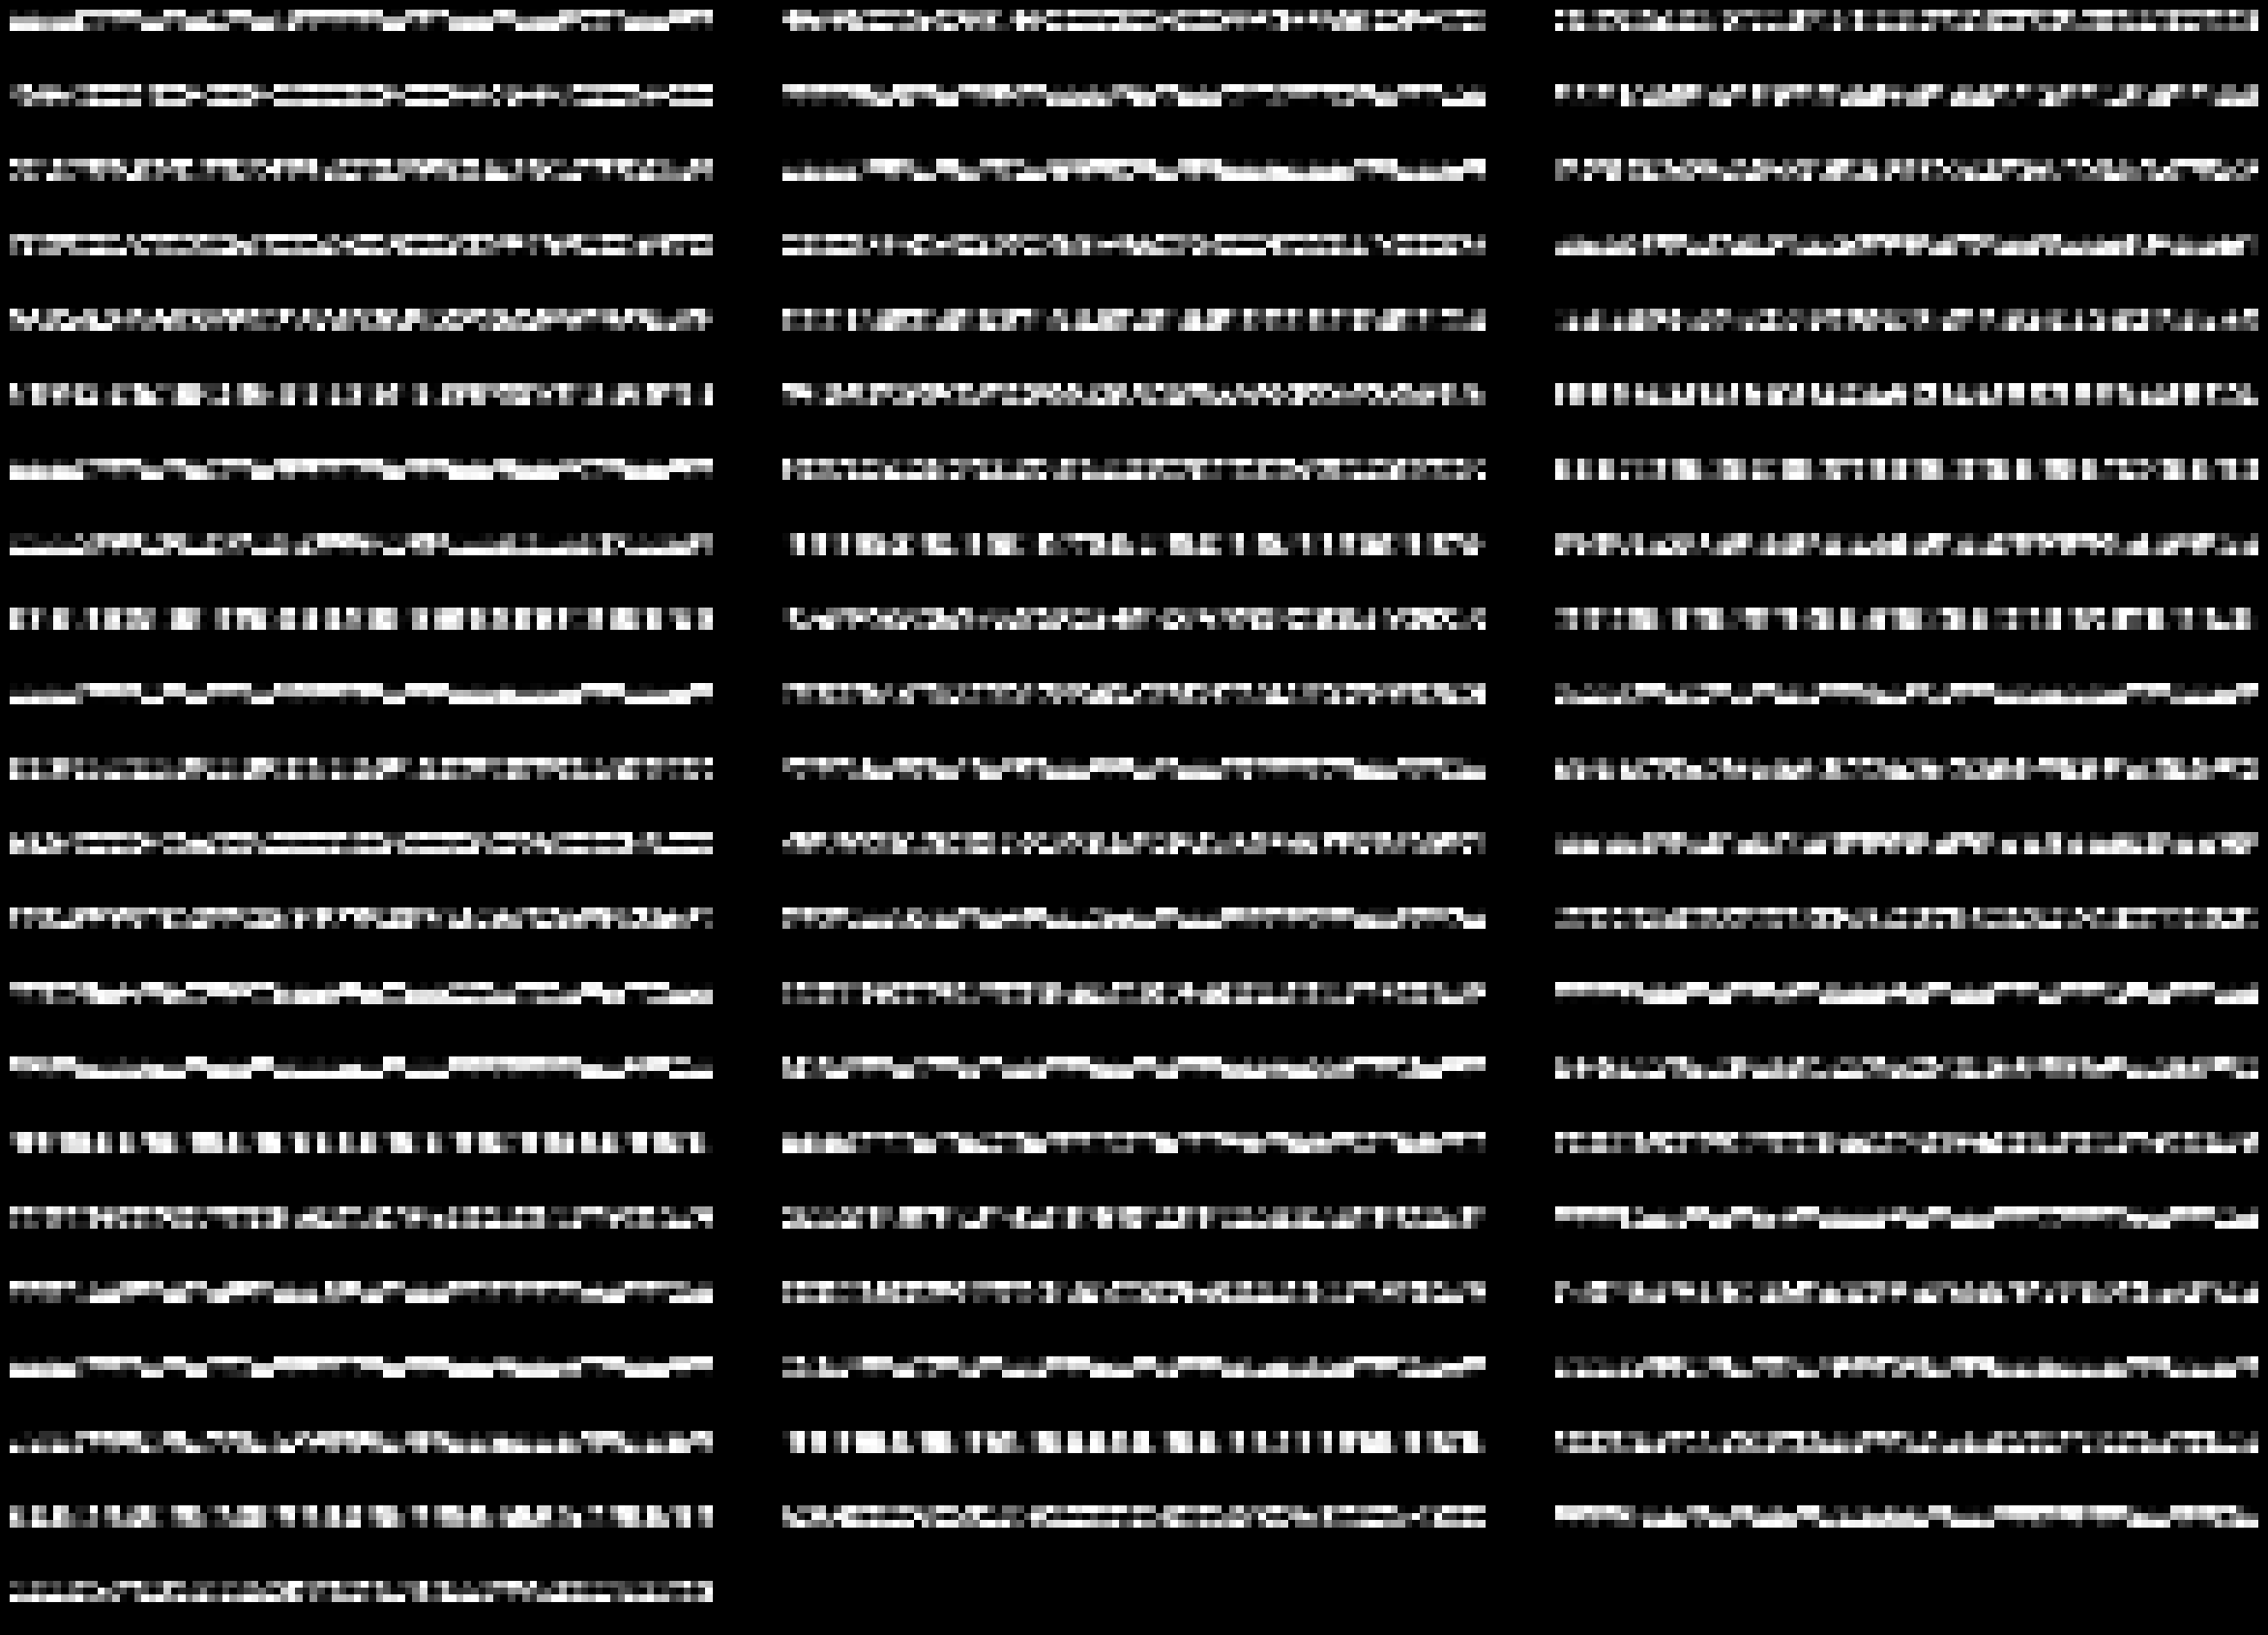

In [11]:
# print second layer kernel
num_kernels_3 = model.conv2.weight.size(0)
print(num_kernels_3)
num_channels = model.conv2.weight.size(1)

xaxes = num_kernels_3 // 3 + 1
yaxes = 3
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes * 10, xaxes))

# Set black background
fig.patch.set_facecolor('black')

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels_2:
            continue
        
        # Create a grid of all channels for the current kernel
        grid = []
        for c in range(num_channels):
            img = model.conv3.weight[count, c].detach().cpu().numpy()
            img = (img - img.min()) / (img.max() - img.min())
            grid.append(img)
        
        grid = np.concatenate(grid, axis=1)
        
        if xaxes == 1:
            axes[j].imshow(grid, cmap='gray')
        else:
            axes[i, j].imshow(grid, cmap='gray')
        count += 1

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Files already downloaded and verified
tensor(5)


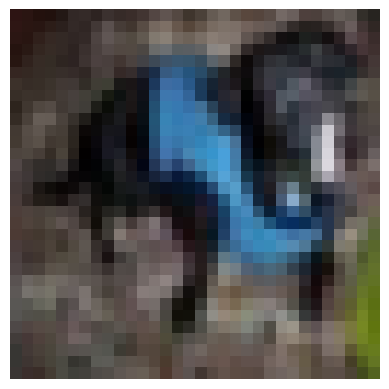

In [16]:
# get random image
from datasets import FastCIFAR10

cifar = FastCIFAR10(root='./data', train=True, download=True)
image, label = cifar[27]

print(label)

# plot the image
plt.figure()
plt.imshow(image.permute(1, 2, 0))
plt.axis('off')
plt.show()


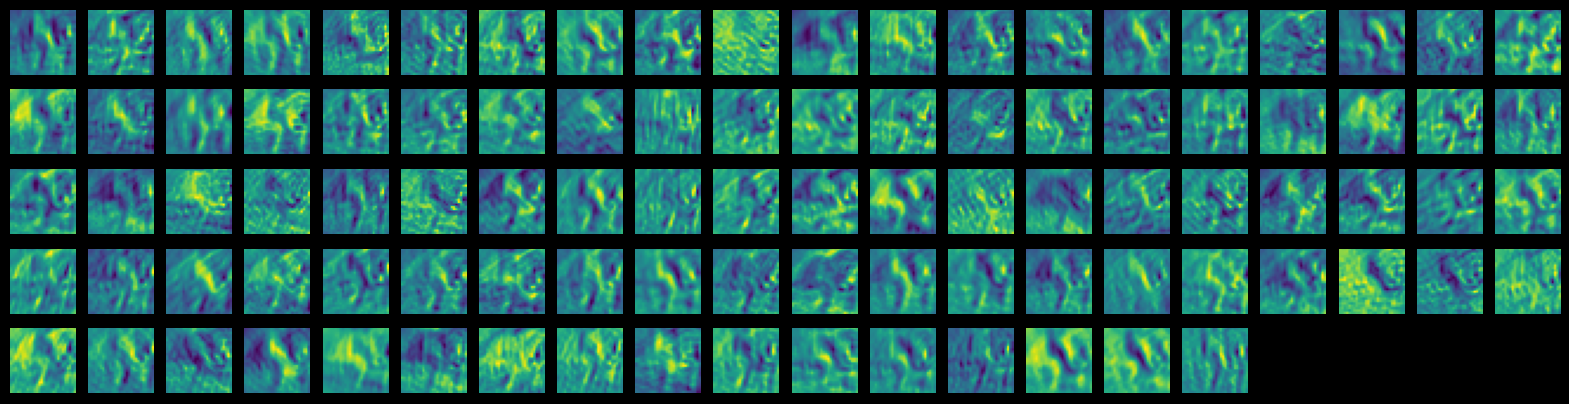

In [17]:
# show images generated from kernels
num_kernels = model.conv1.weight.size(0)
xaxes = num_kernels // 20 + 1
yaxes = 20
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background
fig.patch.set_facecolor('black')

img_stack = []
image = model.bn1(image.unsqueeze(0)).squeeze(0)

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        kernel = model.conv1.weight[count].detach().cpu()
        img = torch.nn.functional.conv2d(image.unsqueeze(0), kernel.unsqueeze(0)).squeeze(0).squeeze(0)
        img_stack.append(img)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1

plt.show()

img_stack = torch.stack(img_stack)
img_stack = model.pool1(img_stack)
img_stack = model.activ1(img_stack)
img_stack = model.bn2(img_stack.unsqueeze(0)).squeeze(0)

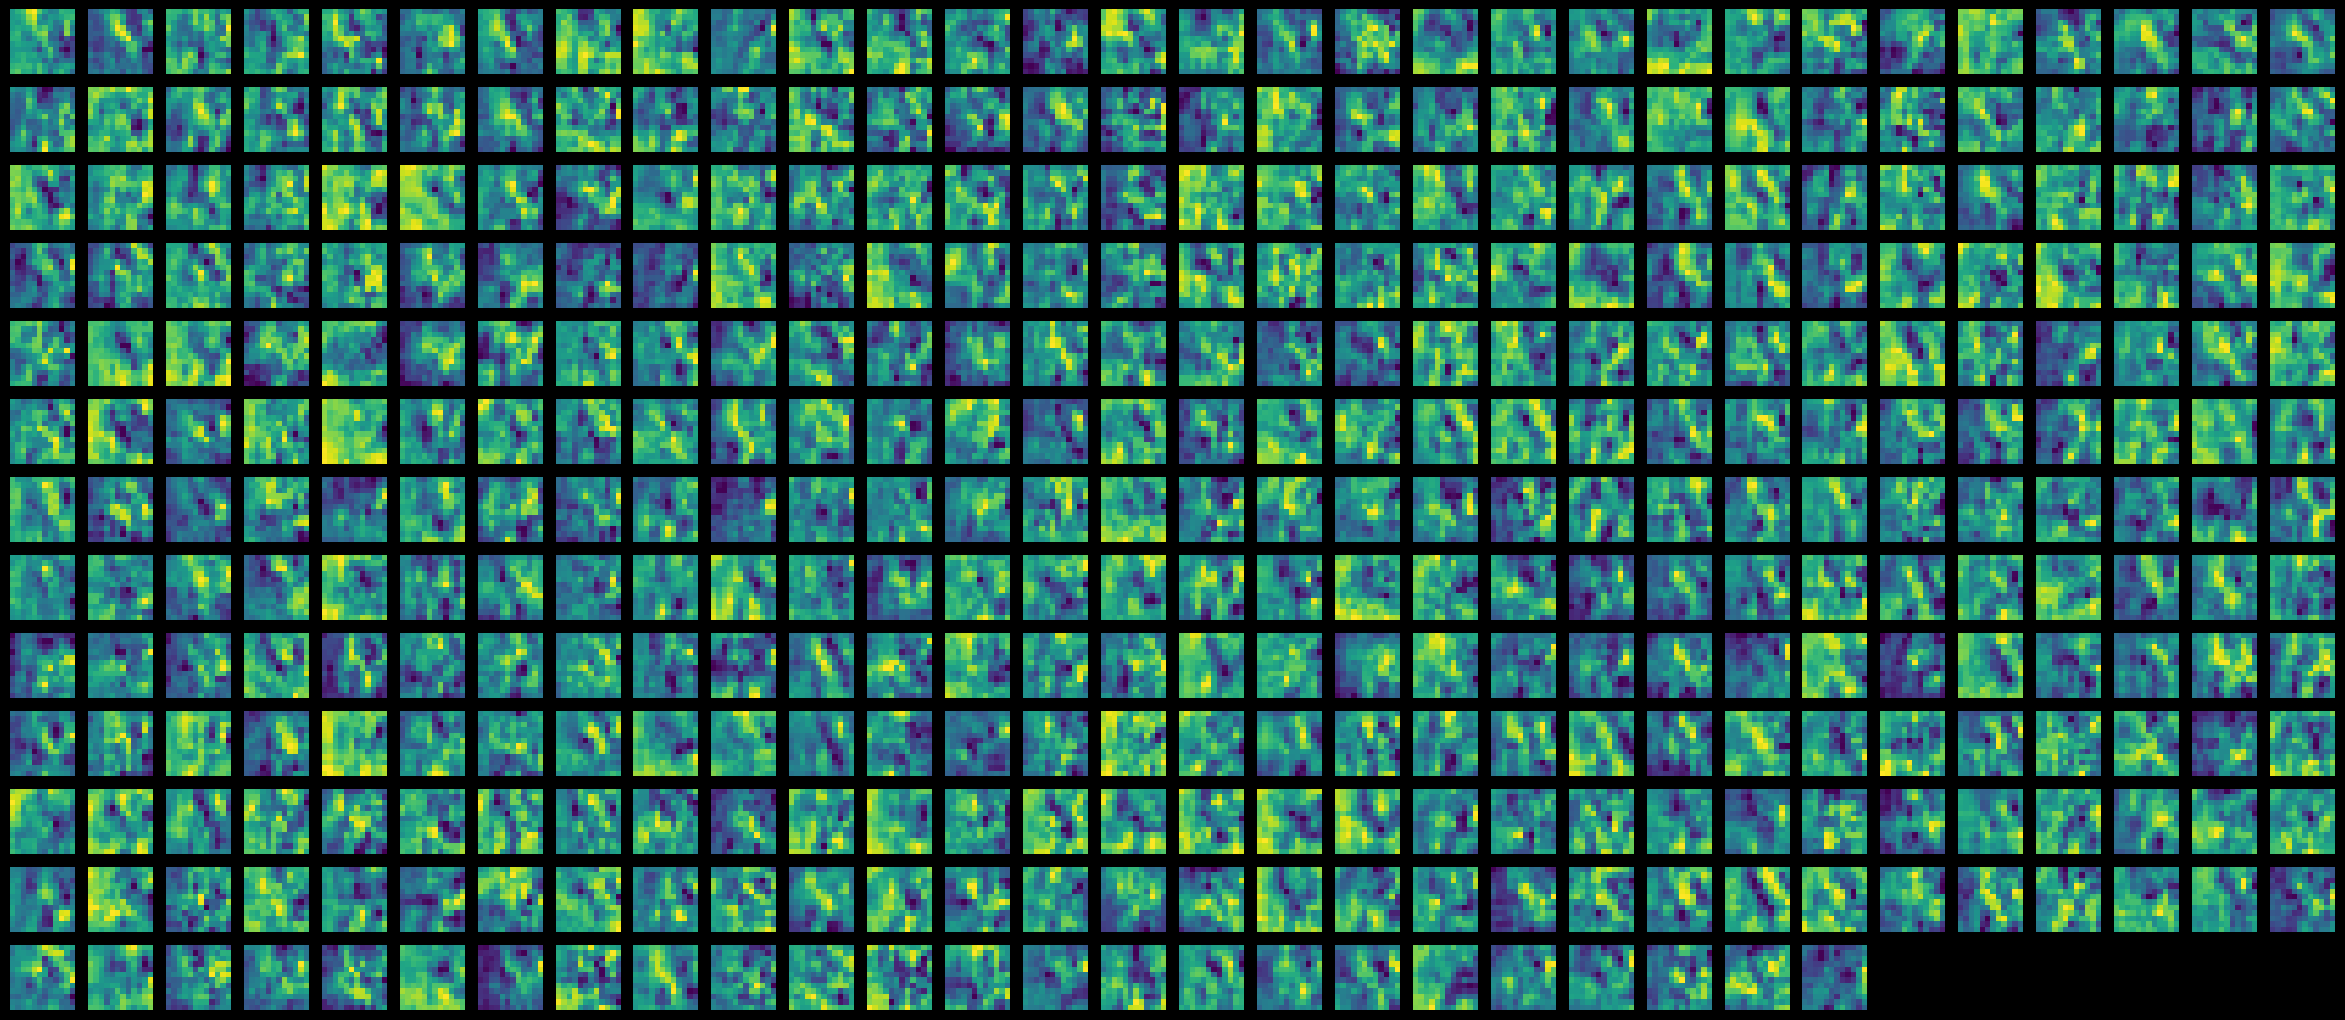

In [18]:
# show images generated from second convolution
num_kernels = model.conv2.weight.size(0)
xaxes = num_kernels // 30 + 1
yaxes = 30

fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background
fig.patch.set_facecolor('black')

img_stack_2 = []

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        kernel = model.conv2.weight[count].detach().cpu()
        img = torch.nn.functional.conv2d(img_stack.unsqueeze(0), kernel.unsqueeze(0)).squeeze(0).squeeze(0)
        img_stack_2.append(img)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1

plt.show()

img_stack_2 = torch.stack(img_stack_2)
img_stack_2 = model.pool2(img_stack_2)
img_stack_2 = model.activ2(img_stack_2)
img_stack_2 = model.bn3(img_stack_2.unsqueeze(0)).squeeze(0)


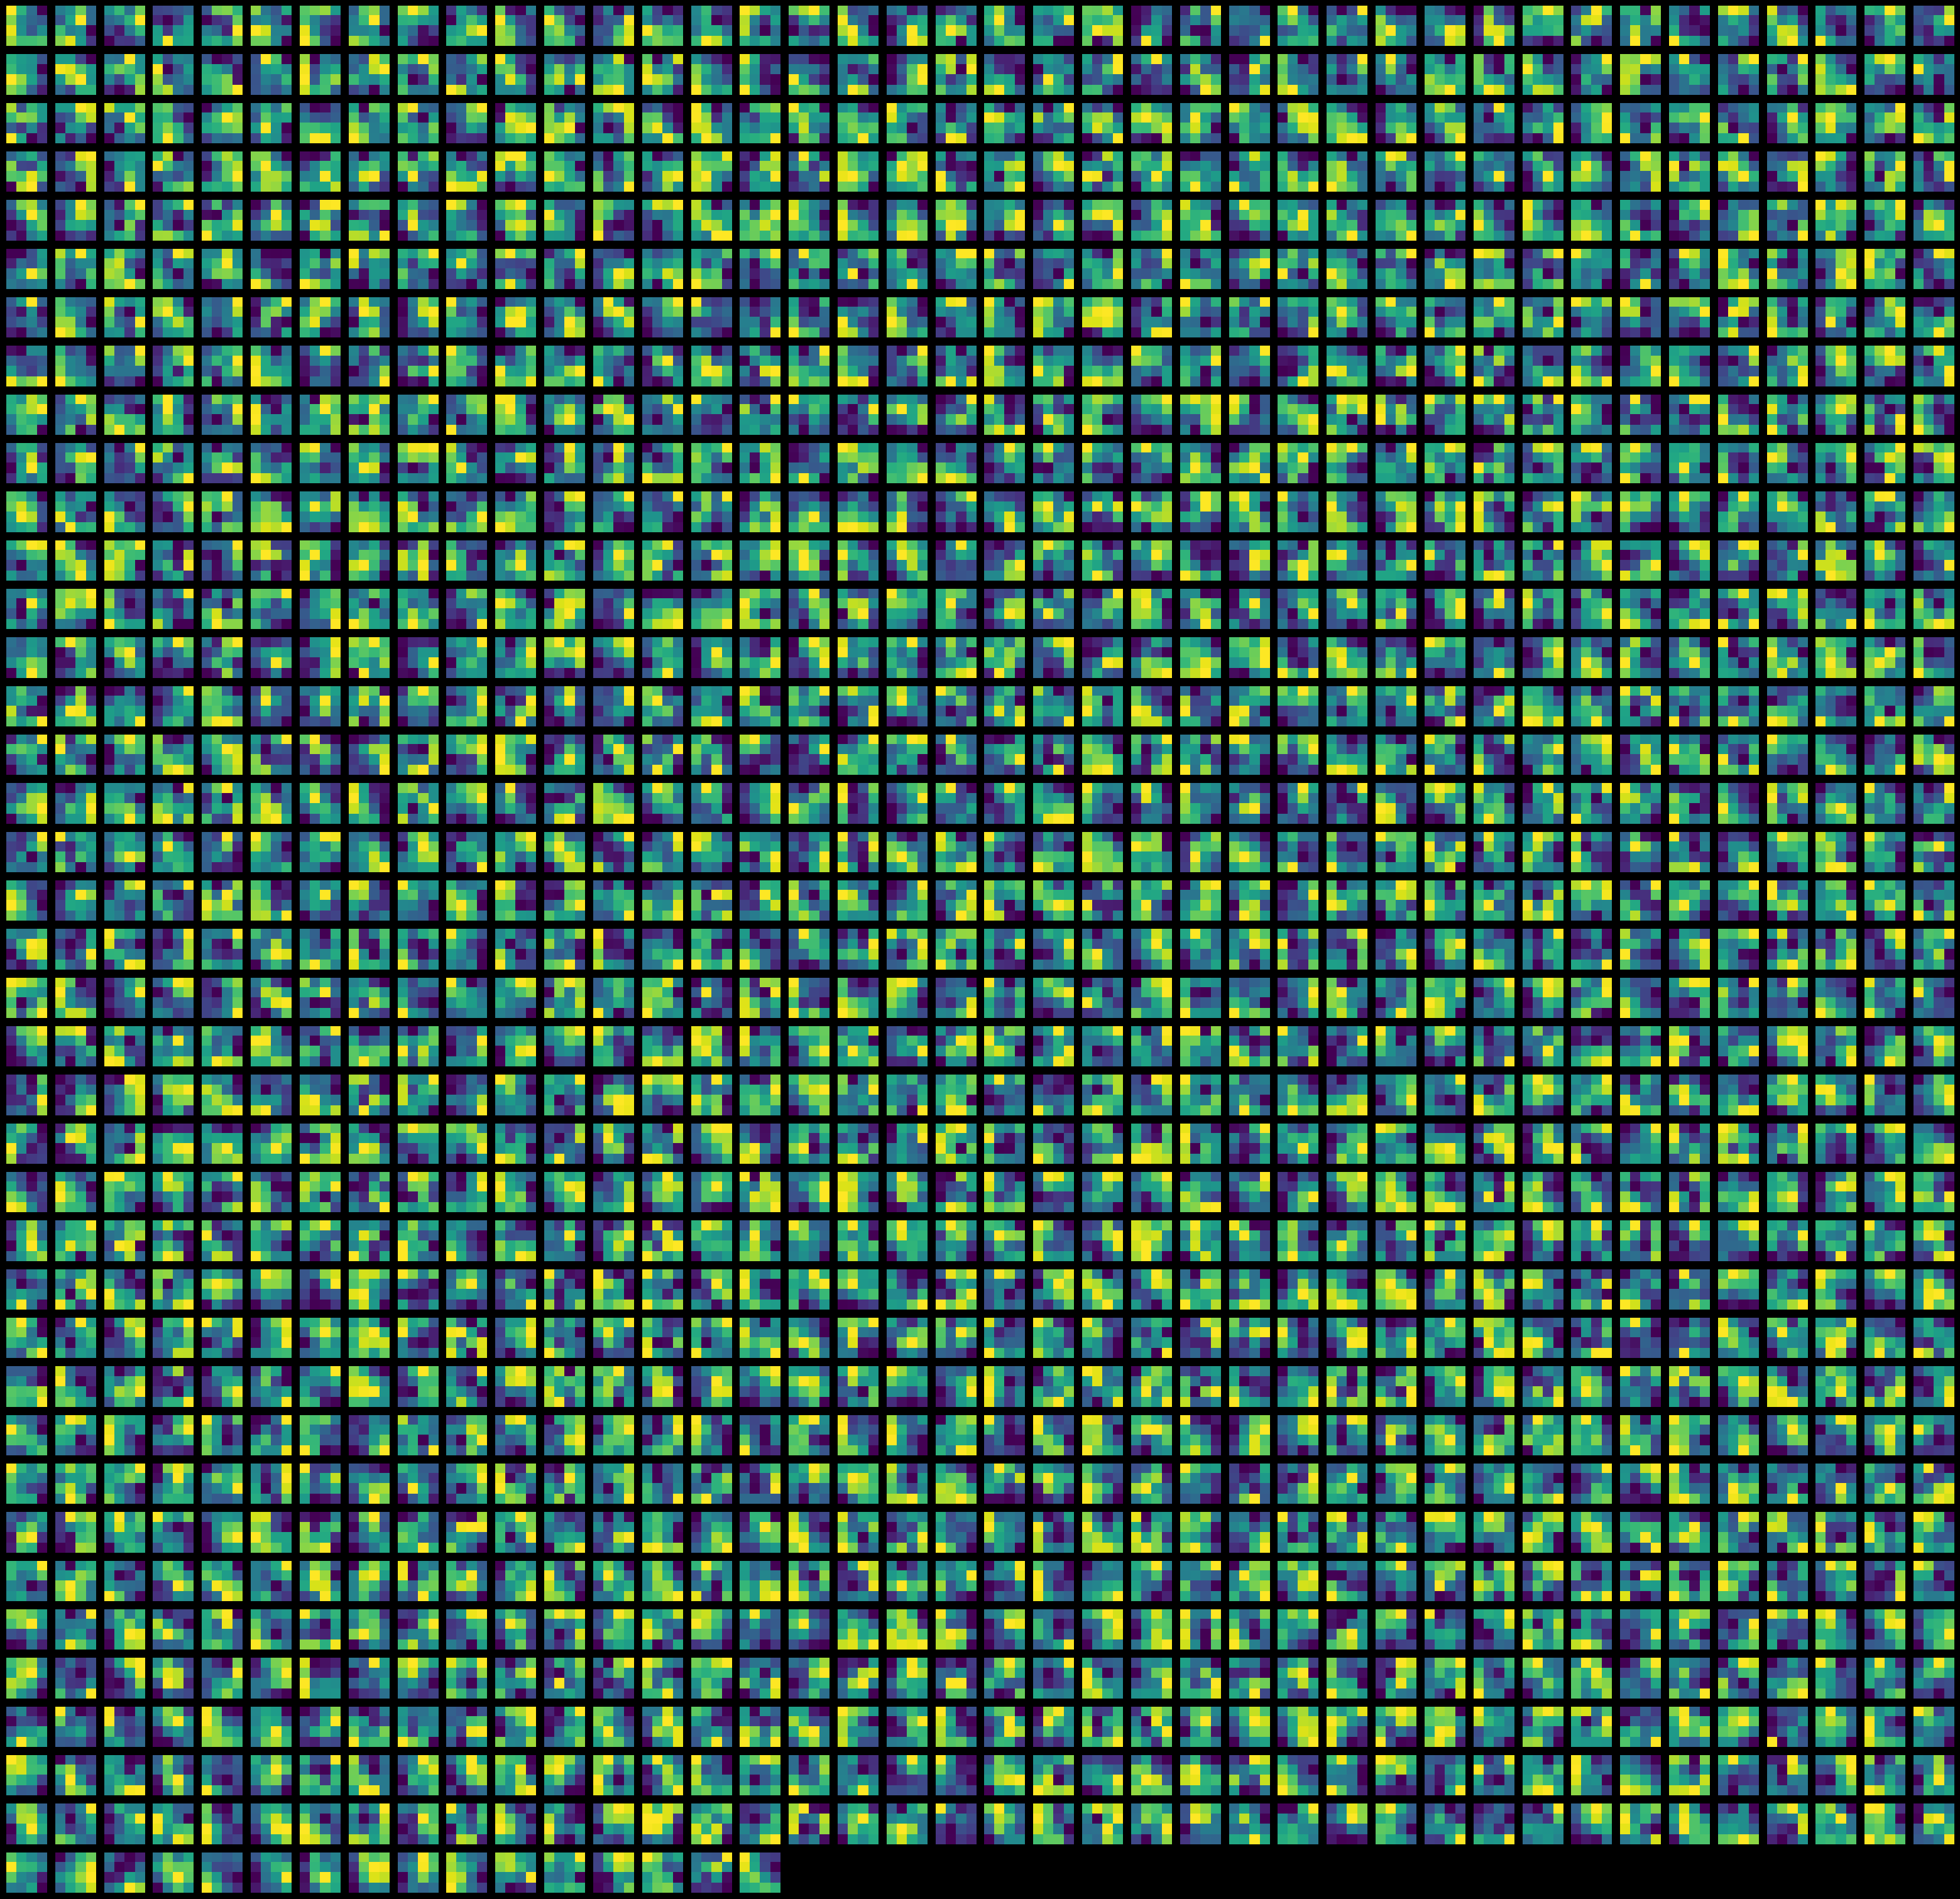

In [30]:
# show images generated from third convolution
num_kernels = model.conv3.weight.size(0)
xaxes = num_kernels // 40 + 1
yaxes = 40

fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background
fig.patch.set_facecolor('black')

img_stack_3 = []

count = 0

for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        kernel = model.conv3.weight[count].detach().cpu()
        img = torch.nn.functional.conv2d(img_stack_2.unsqueeze(0), kernel.unsqueeze(0)).squeeze(0).squeeze(0)
        img_stack_3.append(img)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1

img_stack_3 = torch.stack(img_stack_3)
img_stack_3 = model.pool3(img_stack_3)
img_stack_3 = model.activ3(img_stack_3)


In [8]:
# show flattened image
img_stack_3 = img_stack_3.view(-1)
img_stack_3 = (img_stack_3 - img_stack_3.min()) / (img_stack_3.max() - img_stack_3.min())

print(img_stack_3)

for i in range(0, len(img_stack_3), 28):
    print(img_stack_3[i:i+28])



tensor([2.9343e-01, 3.4762e-01, 1.0847e-01, 0.0000e+00, 6.0276e-01, 5.5940e-01,
        3.7255e-01, 0.0000e+00, 8.6905e-01, 7.4518e-01, 2.3712e-01, 2.7124e-01,
        1.5495e-01, 3.4729e-01, 0.0000e+00, 0.0000e+00, 1.4421e-01, 5.4122e-01,
        3.2001e-01, 1.5444e-01, 1.8394e-01, 4.7023e-01, 0.0000e+00, 0.0000e+00,
        4.5149e-02, 2.8829e-01, 0.0000e+00, 0.0000e+00, 2.6385e-01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.2436e-01, 4.6491e-01, 0.0000e+00, 0.0000e+00,
        1.2667e-01, 1.1400e-01, 3.3131e-02, 0.0000e+00, 4.5313e-01, 8.1826e-01,
        0.0000e+00, 9.6257e-04, 2.6897e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0509e-01, 8.9067e-01, 0.0000e+00, 1.1323e-01, 1.7959e-01, 4.0279e-01,
        0.0000e+00, 0.0000e+00, 3.5288e-01, 6.1762e-02, 0.0000e+00, 0.0000e+00,
        4.1101e-01, 1.0238e-01, 1.2986e-01, 0.0000e+00, 2.5081e-01, 4.3529e-01,
        0.0000e+00, 0.0000e+00, 2.8701e-01, 2.3256e-01, 1.7137e-01, 0.0000e+00,
        3.0137e-01, 5.4941e-01, 0.0000e+